In [4]:
import tensorflow as tf
import os
import glob
import numpy as np
import argparse
from pathlib import Path

/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [53]:
tf.keras.applications.VGG16??

Signature: tf.keras.applications.VGG16(*args, **kwargs)
Docstring: <no docstring>
Source:   
  def wrapper(*args, **kwargs):
    if hasattr(keras_applications, 'get_submodules_from_kwargs'):
      kwargs['backend'] = backend
      if 'layers' not in kwargs:
        kwargs['layers'] = layers
      kwargs['models'] = models
      kwargs['utils'] = utils
    return base_fun(*args, **kwargs)
File:      ~/.local/lib/python3.6/site-packages/tensorflow/python/keras/applications/__init__.py
Type:      function


In [12]:
import PIL
import textwrap as tw
import matplotlib.pyplot as plt
import numpy as np

In [13]:
img1 = PIL.Image.open('./img1.jpg')
img2 = PIL.Image.open('./img2.jpg')

In [18]:
def plt_fig_text(plt, facecolor, textstr):
    props = dict(boxstyle='round', facecolor=facecolor, alpha=0.5)
    fig_txt = tw.fill(tw.dedent(textstr), width=80)
    plt.figtext(0.51, 0.05, fig_txt, horizontalalignment='center',
                fontsize=12, multialignment='center',
                bbox=dict(boxstyle="round", facecolor=facecolor,
                            ec="0.5", pad=0.5, alpha=1), fontweight='bold')
    return plt

        
def show(image_1,image_2,similarity, dissimilarity, euc, my_logits):
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.title(('Similarity: %.2f, Dissimilarity: %.2f, Euclidean Dist: %.2f, Logits: %.2f' % (similarity, dissimilarity, euc, my_logits)), loc='center')
    if my_logits < 0.5:
        textstr = 'Similar'
        plt = plt_fig_text(plt, "green", textstr)
    else:
        textstr = 'Dissimilar'
        plt = plt_fig_text(plt, "red", textstr)

    plt.axis('off')
    ax1 = fig.add_subplot(1, 2, 1)
    l_im = np.array(image_1)
    ax1.imshow(l_im)
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    r_im = np.array(image_2)
    ax2.imshow(r_im)
    ax2.axis('off')

    plt.show()


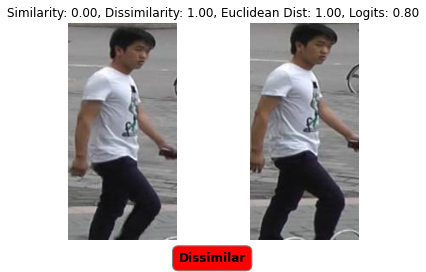

In [19]:
show(img1, img2, similarity=0, dissimilarity=1, euc=1, my_logits=0.8)

In [51]:
model = tf.keras.applications.VGG19(include_top=False, input_shape=(256, 128, 3))

39796736/80134624 [=============>................] - ETA: 9s

KeyboardInterrupt: 

In [44]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 64, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 64, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 64, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 32, 128)       0     

In [50]:
model.layers

AttributeError: 'list' object has no attribute 'trainable'

In [46]:
tf.layers.AveragePooling2D

tensorflow.python.layers.pooling.AveragePooling2D

In [45]:
512*4*8

16384

In [19]:
a = np.array([0, 0.8, 2.0, 1.5])

In [20]:
b = (a < 1.0).astype(np.int32)

In [21]:
b 

array([1, 1, 0, 0], dtype=int32)

In [22]:
a_tf = tf.convert_to_tensor(a)

In [23]:
b_tf = tf.convert_to_tensor(b)

In [32]:
labels = np.array([1, 0, 0, 0])
labels = tf.convert_to_tensor(labels)

In [33]:
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [34]:
d = auroc(labels, b )

In [35]:
sess = tf.Session()

In [36]:
sess.run([d])


[0.8333333333333334]

In [30]:
a[a<1.0]

array([0. , 0.8])

In [2]:
inputs = {}
targets = {}
#         self.reset_data = {}
iter_handle = {}
dataset = {} 

handle = tf.placeholder(tf.string, shape=[])
def get_next():
    iterator = tf.data.Iterator.from_string_handle(
                    handle, dataset["train"].output_types, dataset["train"].output_shapes)
    next_batch = iterator.get_next()
    return next_batch

# for _set_type in ["train", "valid"]:
#     if _set_type == "train":
#         filename = 'train.tfrecords'
#         train = True
#     else:
#         filename = 'val.tfrecords'
#         train = False

dataset["train"] =  Dataset.range(10, 50)
dataset["valid"] =  Dataset.range(60, 100)

iter_handle["train"] = dataset["train"].make_one_shot_iterator().string_handle()
iter_handle["valid"] = dataset["valid"].make_one_shot_iterator().string_handle()



inputs["train"], targets["train"] = get_next()
    
with tf.train.MonitoredTrainingSession() as sess:
    handle_train, handle_val = sess.run([iter_handle["train"], iter_handle["valid"]])
    
    for step in range(10):
        print('train', sess.run(next_batch, feed_dict={handle: handle_train}))
        
        if step % 3 == 0:
            print('val', sess.run(next_batch, feed_dict={handle: handle_val}))
    
    

NameError: name 'Dataset' is not defined

In [3]:
import tensorflow as tf
from tensorflow.data import Dataset
dataset_train = Dataset.range(10)
dataset_val = Dataset.range(90, 100)

iter_train_handle = dataset_train.make_one_shot_iterator().string_handle()
iter_val_handle = dataset_val.make_one_shot_iterator().string_handle()

handle = tf.placeholder(tf.string, shape=[])
iterator = tf.data.Iterator.from_string_handle(
    handle, dataset_train.output_types, dataset_train.output_shapes)
next_batch = iterator.get_next()

with tf.train.MonitoredTrainingSession() as sess:
    handle_train, handle_val = sess.run([iter_train_handle, iter_val_handle])
    
    for step in range(10):
        print('train', sess.run(next_batch, feed_dict={handle: handle_train}))
        
        if step % 3 == 0:
            print('val', sess.run(next_batch, feed_dict={handle: handle_val}))


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
train 0
val 90
train 1
train 2
train 3
val 91
train 4
train 5
train 6
val 92
train 7
train 8
train 9
val 93


In [2]:
from data_utils import *

In [3]:
tfrecords_path='tf_record_dir/train.tfrecords'
BATCH_SIZE = 8

# train_dataset = load_dataset(tfrecords_path, batch_size=BATCH_SIZE, train=True)

In [4]:
dataset = get_data(tfrecords_path, BATCH_SIZE, augment=True, train=True)
dataset_val = get_data(tfrecords_path, BATCH_SIZE, augment=True, train=False)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [50]:
!pip3 install scikit-learn

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 7.1MB 176kB/s ta 0:00:011
    100% |████████████████████████████████| 20.2MB 65kB/s eta 0:00:011
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl


In [1]:
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
y_true =

In [ ]:
de
label = tf.equal(self.x_label["train"], self.y_label["train"])
labels = tf.cast(label, tf.int32)

logits = tf.cast(self.logits["train"], tf.float32)
preds = tf.cast((logits < 0.5), tf.int32)
acc_def = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))

In [47]:

label = tf.equal(self.x_label["train"], self.y_label["train"])
labels = tf.cast(label, tf.int32)

logits = tf.cast(self.logits["train"], tf.float32)
preds = tf.cast((logits < 0.5), tf.int32)
acc_def = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))
#                 acc = tf.metrics.accuracy(labels=labels, predictions=preds)
short_fetch = {
    "logits": self.logits["train"],
    "x_label": self.x_label["train"],
    "y_label": self.y_label["train"],
    "preds": preds,
    "labels": labels,
    "acc" : self.accuracy["train"],
    "labels": self.labels["train"],
    "preds": self.preds["train"],
    "acc_def": acc_def,
    "acc_update_op": self.accuracy_up["train"]
}
res_s = self.sess.run(short_fetch,feed_dict={self.is_training: True, self.handle: training_handle})
print ("Model - labels: {}, preds {}, acc {}, acc_up {}".format(res_s["labels"], res_s["preds"], res_s["acc"], res_s["acc_update_op"]))
print("Mine Accuracy {}".format(res_s["acc_def"]))
print ("Acc: {}, LOgits: {}, Predictions : {} ,Labels: {}, X: {}, Y: {}, ".format(res_s["acc"], res_s["logits"], res_s["preds"], res_s["labels"], res_s["x_label"], res_s["y_label"]))


NameError: name 'self' is not defined

In [17]:
iter_handle = dataset_val.make_one_shot_iterator().string_handle()
            
# iterator = tf.data.Iterator.from_string_handle(
#                 handle, self.dataset["train"].output_types, self.dataset["train"].output_shapes)
#             next_batch = iterator.get_next()
#             self.inputs[_set_type], self.targets[_set_type] = next_batch
        
handle = tf.placeholder(tf.string, shape=[])
iterator = tf.data.Iterator.from_string_handle(
    handle, dataset.output_types, dataset.output_shapes)
next_batch = iterator.get_next()
inps, targets = next_batch



In [37]:
sess = tf.Session()

In [45]:
b_tf = tf.cast(a_tf < 1.0, tf.int32)

In [46]:
sess.run([b_tf])

[array([1, 1, 0, 0], dtype=int32)]

In [19]:
handle_train = sess.run(iter_handle)

In [20]:
for i in range(10):
    image_batch, label_batch = sess.run([inps, targets], feed_dict={handle: handle_train})
    left_im_b, left_im, left_label, _ = image_batch
    right_im_b, right_im, right_label, _ = label_batch
    print (left_im.shape, left_label.shape)

(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)
(8, 256, 128, 3) (8,)


In [21]:
a = left_im[2]
b = left_im_b[2]

In [22]:
a.shape, b.shape

((256, 128, 3), (256, 128, 3))

In [23]:
from PIL import Image

In [24]:
import matplotlib.pyplot as plt

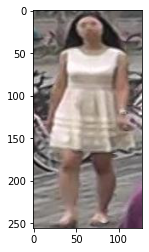

In [25]:
plt.imshow(a)

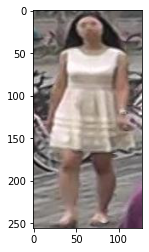

In [26]:
plt.imshow(b)

In [27]:
a.min(), a.max()

(0.015686275, 1.0)

# Model

In [17]:
from train_ops import network

In [18]:
logits, left_features, right_features = network(left_im, right_im, is_training=True, batch_size=BATCH_SIZE)



(8, 256, 128, 3)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

(8, 256, 128, 256)
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
(8, 128, 64, 256)
(8, 128, 64, 128)
(8, 64, 32, 128)
(8, 64, 32, 64)
(8, 32, 16, 64)
(8, 32, 16, 32)
(8, 16, 8, 32)
(8, 4096)
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
(8, 4096)
(8, 256, 128, 3)
(8, 256, 128, 256)
(8, 128, 64, 256)
(8, 128, 64, 128)
(8, 64, 32, 128)
(8, 64, 32, 64)
(8, 32, 16, 64)
(8, 32, 16, 32)
(8, 16, 8, 32)
(8, 4096)
(8, 4096)
[*] Model ran


In [51]:
im.size

(128, 256)

In [52]:
im_np = np.array(im)

In [53]:
im_np.shape

(256, 128, 3)

In [55]:
im_np = im_np/255.0

In [56]:
im_np.min(), im_np.max()

(0.00784313725490196, 1.0)

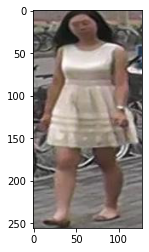

In [57]:
plt.imshow(im_np)

In [13]:
from train_ops import network, contrastive_loss

In [14]:
logits, left_feat, right_feat = network(left_im, right_im)



(8, 256, 128, 3)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

(8, 256, 128, 256)
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
(8, 128, 64, 256)
(8, 128, 64, 128)
(8, 64, 32, 128)
(8, 64, 32, 64)
(8, 32, 16, 64)
(8, 32, 16, 32)
(8, 16, 8, 32)
Instructions for updating:
Use keras.layers.flatten instead.
(8, 4096)
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
(8, 4096)
(8, 256, 128, 3)
(8, 256, 128, 256)
(8, 128, 64, 256)
(8, 128, 64, 128)
(8, 64, 32, 128)
(8, 64, 32, 64)
(8, 32, 16, 64)
(8, 32, 16, 32)
(8, 16, 8, 32)
(8, 40

In [17]:
contrastive_loss(left_feat, right_feat, logits, left_label, right_label, margin=0.2, use_loss=True)
total_loss = tf.losses.get_total_loss()
global_step = tf.Variable(0, trainable=False)

In [18]:
params = tf.trainable_variables()
gradients = tf.gradients(total_loss, params)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
updates = optimizer.apply_gradients(zip(gradients, params), global_step=global_step)
global_init = tf.variables_initializer(tf.global_variables())

# Create Model

In [12]:
def inference(left_input_image, right_input_image):
    margin = 0.2
    """
	left_input_image: 3D tensor input
	right_input_image: 3D tensor input
	label: 1 if images are from same category. 0 if not.
	"""
    with tf.variable_scope('feature_generator', reuse=tf.AUTO_REUSE) as sc:

        left_features = model(tf.layers.batch_normalization(left_input_image))
        right_features = model(tf.layers.batch_normalization(right_input_image))

    merged_features = tf.abs(tf.subtract(left_features, right_features))
    logits = tf.contrib.layers.fully_connected(merged_features, num_outputs=1, activation_fn=None)
    logits = tf.reshape(logits, [-1])
    return logits, left_features, right_features

In [ ]:
def combine_dataset(tfrecords_path,batch_size, image_size, same_prob, diff_prob, repeat=True, train=True, transfer=False):
    """
	Input:
		image size (int)
		batch_size (int)
		same_prob (float): probability of retaining images in same class
		diff_prob (float): probability of retaining images in different class
		train (boolean): train or validation
		repeat (boolean): repeat elements in dataset
	Return:
		zipped dataset

	"""
    dataset_left = make_single_dataset(image_size, tfrecords_path, repeat=repeat, train=train, transfer=transfer)
    dataset_right = make_single_dataset(image_size, tfrecords_path, repeat=repeat, train=train, transfer=transfer)
    
    dataset = tf.data.Dataset.zip((dataset_left, dataset_right))

    if train:
        filter_func = create_filter_func(same_prob, diff_prob)
        dataset = dataset.filter(filter_func)
    if repeat:
        dataset = dataset.repeat()

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(1)
    return dataset

def make_single_dataset(image_size=[256, 128], tfrecords_path="./MARS/mars_train_00000-of-00001.tfrecord", shuffle_buffer_size=2000, repeat=True, train=True, transfer=False):
    """
	Input:
		image_size: size of input images to network
		tfrecords_path: address to tfrecords file containing all image data
		shuffle_buffer_size: number of images to load into a memory for a shuffling 			operation.
		repeat (boolean): repeat dataset
		train (boolean): use in training
	Features:
		image: image tensor
		label: label tensor
		height: original image height
		width: original image width
		addr: image address in file system
	Returns:
		Dataset
	"""

    image_size = tf.cast(image_size, tf.int32)

    def _parse_function(example_proto):

        features = {'image/class/label': tf.FixedLenFeature((), tf.int64, default_value=1),
	    	'image/encoded': tf.FixedLenFeature((), tf.string, default_value=""),
	    	'image/height': tf.FixedLenFeature([], tf.int64),
	    	'image/width': tf.FixedLenFeature([], tf.int64),
	    	'image/format': tf.FixedLenFeature((), tf.string, default_value="")}

        parsed_features = tf.parse_single_example(example_proto, features)
        image_buffer = parsed_features['image/encoded']

        image = tf.image.decode_jpeg(image_buffer,channels=3)
        image = tf.cast(image, tf.float32)

        S = tf.stack([tf.cast(parsed_features['image/height'], tf.int32),
    		tf.cast(parsed_features['image/width'], tf.int32), 3])
        image = tf.reshape(image, S)

        image = tf.image.convert_image_dtype(image, tf.float32)

        if transfer :
            image = tf.image.resize_images(image, [224, 224]) ## Use only VGG19 for this
        else : 
            image = tf.image.resize_images(image, [256, 128])

        return image, parsed_features['image/class/label'], parsed_features['image/format']

    filenames = [tfrecords_path]

    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(_parse_function, num_parallel_calls=8)
    return dataset


In [40]:
 ## Hard coded values, could be passed as arguments
batch_size = 32
max_epoch = 200

dataset_dir = '/home/abhi/internship/study'

train_record = str(glob.glob(str(Path(arg.path)) + '/*train*.tfrecord')[0])
val_record = str(glob.glob(str(Path(arg.path)) + '/*validation*.tfrecord')[0])


NameError: name 'arg' is not defined

In [34]:
! python data_tfrecord.py

/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [42]:
import glob
import os
import random
import numpy as np
import sys
import PIL
from pathlib import Path

In [6]:
pwd

'/home/abhi/internship/study/fastbook'

In [7]:
def get_filenames(data_root):
    directories, categories, filenames = [], [], []
    if os.path.exists(data_root):
        for filename in os.listdir(data_root):
            path = os.path.join(data_root, filename)
            if os.path.isdir(path):
                directories.append(path)
                categories.append(filename)
        for directory in directories:
            for filename in os.listdir(directory):
                path = os.path.join(directory, filename)
                filenames.append(path)
    return filenames, categories

In [8]:
dataset_dir = '/home/abhi/internship/study'
train_data = 'bbox_train'
test_data = 'bbox_test'
validation_size = 0.2

train_data_root = os.path.join(dataset_dir, train_data)
test_data_root = os.path.join(dataset_dir, test_data)
filenames, categories = get_filenames(train_data_root)
test_fnames, test_categories = get_filenames(test_data_root)

In [15]:
# Temporary Settings
filenames = filenames[:1000]

In [16]:
len(filenames), len(categories)

(1000, 625)

In [17]:
len(test_fnames), len(test_categories)

(0, 0)

In [19]:
validation_size = 0.2
train_category2ids = dict(zip(categories, range(len(categories))))
test_category2ids = dict(zip(test_categories, range(len(test_categories))))
val_size = int(validation_size * len(filenames))

random.seed(32)
random.shuffle(filenames)
train_fnames = filenames[val_size:]
val_fnames = filenames[:val_size]

In [20]:
len(filenames)

1000

In [43]:
len(train_fnames), len(val_fnames)

(800, 200)

In [32]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def get_filenames(data_root):
    directories, categories, filenames = [], [], []
    if os.path.exists(data_root):
        for filename in os.listdir(data_root):
            path = os.path.join(data_root, filename)
            if os.path.isdir(path):
                directories.append(path)
                categories.append(filename)
        for directory in directories:
            for filename in os.listdir(directory):
                path = os.path.join(directory, filename)
                filenames.append(path)
    return filenames, categories

def createDataRecord(out_filename, fnames, category2ids):
    # open the TFRecords file
    writer = tf.python_io.TFRecordWriter(out_filename)
    for i in range(len(fnames)):
        # print how many images are saved every 1000 images
        if not i % 100:
            print(f'{out_filename}: {i}/{len(fnames)}')
            sys.stdout.flush()
        # Load the image
        img = np.array(PIL.Image.open(fnames[i]))

        if img is None:
            continue
        
        height = img.shape[0]
        width = img.shape[1]
        
        cat_name = os.path.basename(os.path.dirname(fnames[i]))
        cat_id = category2ids[cat_name]
        
        # Create a feature
        feature = {
            'image/encoded': _bytes_feature(img.tostring()),
            'image/format': _bytes_feature( b'jpg'),
            'image/category': _int64_feature(cat_id),
            'image/height': _int64_feature(height),
            'image/width': _int64_feature(width)
        }
        
        # Create an example protocol buffer
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        
        # Serialize to string and write on the file
        writer.write(example.SerializeToString())
        
    writer.close()
    sys.stdout.flush()
    
    
def main():  
    dataset_dir = '/home/abhi/internship/study'
    train_data = 'bbox_train'
    test_data = 'bbox_test'
    validation_size = 0.2

    train_data_root = os.path.join(dataset_dir, train_data)
    test_data_root = os.path.join(dataset_dir, test_data)
    filenames, categories = get_filenames(train_data_root)
    test_fnames, test_categories = get_filenames(test_data_root)

    # Temporary Settings
    filenames = filenames[:1000]

    validation_size = 0.2
    train_category2ids = dict(zip(categories, range(len(categories))))
    test_category2ids = dict(zip(test_categories, range(len(test_categories))))
    val_size = int(validation_size * len(filenames))

    random.seed(32)
    random.shuffle(filenames)
    train_fnames = filenames[val_size:]
    val_fnames = filenames[:val_size]

    tf_record_dir = Path('./tf_records_data')
    if not tf_record_dir.exists():
        tf_record_dir.mkdir(parents=True)
        createDataRecord(str(tf_record_dir/'train.tfrecords'), train_fnames, train_category2ids)
        createDataRecord(str(tf_record_dir/'val.tfrecords'), val_fnames, train_category2ids)
        createDataRecord(str(tf_record_dir/'test.tfrecords'), test_fnames, test_category2ids)
    else:
        print ("TFRecords already created!")
        

if __name__ == '__main__':
    main()


In [ ]:
def _dataset_exists(dataset_dir, _NUM_SHARDS, output_filename):
  for split_name in ['train', 'validation']:
    for shard_id in range(_NUM_SHARDS):
      tfrecord_filename = _get_dataset_filename(
          dataset_dir, split_name, shard_id, output_filename, _NUM_SHARDS)
      if not tf.gfile.Exists(tfrecord_filename):
        return False
  return True

In [19]:
createDataRecord('train.tfrecords', train_fnames, train_category2ids)
createDataRecord('val.tfrecords', val_fnames, train_category2ids)
createDataRecord('test.tfrecords', test_fnames, test_category2ids)

train.tfrecords: 0/407932
train.tfrecords: 1000/407932
train.tfrecords: 2000/407932
train.tfrecords: 3000/407932
train.tfrecords: 4000/407932
train.tfrecords: 5000/407932
train.tfrecords: 6000/407932
train.tfrecords: 7000/407932
train.tfrecords: 8000/407932
train.tfrecords: 9000/407932
train.tfrecords: 10000/407932
train.tfrecords: 11000/407932
train.tfrecords: 12000/407932
train.tfrecords: 13000/407932
train.tfrecords: 14000/407932
train.tfrecords: 15000/407932
train.tfrecords: 16000/407932
train.tfrecords: 17000/407932
train.tfrecords: 18000/407932
train.tfrecords: 19000/407932
train.tfrecords: 20000/407932
train.tfrecords: 21000/407932
train.tfrecords: 22000/407932
train.tfrecords: 23000/407932
train.tfrecords: 24000/407932
train.tfrecords: 25000/407932
train.tfrecords: 26000/407932
train.tfrecords: 27000/407932
train.tfrecords: 28000/407932
train.tfrecords: 29000/407932
train.tfrecords: 30000/407932
train.tfrecords: 31000/407932
train.tfrecords: 32000/407932
train.tfrecords: 33000/

ResourceExhaustedError: val.tfrecords; No space left on device

In [46]:
from PIL import Image

In [48]:
im = Image.open(filenames[100])

In [49]:
import matplotlib.pyplot as plt

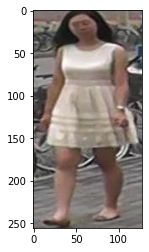

In [50]:
plt.imshow(im)

In [51]:
im.size

(128, 256)

In [52]:
im_np = np.array(im)

In [53]:
im_np.shape

(256, 128, 3)

In [55]:
im_np = im_np/255.0

In [56]:
im_np.min(), im_np.max()

(0.00784313725490196, 1.0)

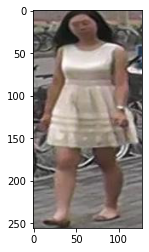

In [57]:
plt.imshow(im_np)

In [ ]:
from random import shuffle
import glob
import sys
import cv2
import numpy as np
#import skimage.io as io
import tensorflow as tf

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def load_image(addr):
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    img = cv2.imread(addr)
    if img is None:
        return None
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
 
def createDataRecord(out_filename, addrs, labels):
    # open the TFRecords file
    writer = tf.python_io.TFRecordWriter(out_filename)
    for i in range(len(addrs)):
        # print how many images are saved every 1000 images
        if not i % 1000:
            print('Train data: {}/{}'.format(i, len(addrs)))
            sys.stdout.flush()
        # Load the image
        img = load_image(addrs[i])

        label = labels[i]

        if img is None:
            continue

        # Create a feature
        feature = {
            'image_raw': _bytes_feature(img.tostring()),
            'label': _int64_feature(label)
        }
        # Create an example protocol buffer
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        
        # Serialize to string and write on the file
        writer.write(example.SerializeToString())
        
    writer.close()
    sys.stdout.flush()

cat_dog_train_path = 'PetImages/*/*.jpg'
# read addresses and labels from the 'train' folder
addrs = glob.glob(cat_dog_train_path)
labels = [0 if 'Cat' in addr else 1 for addr in addrs]  # 0 = Cat, 1 = Dog

# to shuffle data
c = list(zip(addrs, labels))
shuffle(c)
addrs, labels = zip(*c)
    
# Divide the data into 60% train, 20% validation, and 20% test
train_addrs = addrs[0:int(0.6*len(addrs))]
train_labels = labels[0:int(0.6*len(labels))]
val_addrs = addrs[int(0.6*len(addrs)):int(0.8*len(addrs))]
val_labels = labels[int(0.6*len(addrs)):int(0.8*len(addrs))]
test_addrs = addrs[int(0.8*len(addrs)):]
test_labels = labels[int(0.8*len(labels)):]

createDataRecord('train.tfrecords', train_addrs, train_labels)
createDataRecord('val.tfrecords', val_addrs, val_labels)
createDataRecord('test.tfrecords', test_addrs, test_labels)


In [ ]:
#If the TFRecord files already exist in the directory, then exit without creating the files again
    if _dataset_exists(dataset_dir = FLAGS.dataset_dir, _NUM_SHARDS = FLAGS.num_shards, output_filename = FLAGS.tfrecord_filename):
        print('Dataset files already exist. Exiting without re-creating them.')
        return None

    #Get a list of photo_filenames like ['123.jpg', '456.jpg'...] and a list of sorted class names from parsing the subdirectories.
    photo_filenames, class_names = _get_filenames_and_classes(FLAGS.dataset_dir)

    #Refer each of the class name to a specific integer number for predictions later
    class_names_to_ids = dict(zip(class_names, range(len(class_names))))

    #Find the number of validation examples we need
    num_validation = int(FLAGS.validation_size * len(photo_filenames))

    # Divide the training datasets into train and test:
    random.seed(FLAGS.random_seed)
    random.shuffle(photo_filenames)
    training_filenames = photo_filenames[num_validation:]
    validation_filenames = photo_filenames[:num_validation]

    # First, convert the training and validation sets.
    _convert_dataset('train', training_filenames, class_names_to_ids,
                     dataset_dir = FLAGS.dataset_dir, tfrecord_filename = FLAGS.tfrecord_filename, _NUM_SHARDS = FLAGS.num_shards)
    _convert_dataset('validation', validation_filenames, class_names_to_ids,
                     dataset_dir = FLAGS.dataset_dir, tfrecord_filename = FLAGS.tfrecord_filename, _NUM_SHARDS = FLAGS.num_shards)

    # Finally, write the labels file:
    labels_to_class_names = dict(zip(range(len(class_names)), class_names))
    write_label_file(labels_to_class_names, FLAGS.dataset_dir)
    write_data_summary(num_validation, len(photo_filenames), FLAGS.dataset_dir)

    print('\nFinished converting the %s dataset!' % (FLAGS.tfrecord_filename))


In [ ]:
import math
import os
import sys
import tensorflow as tf

slim = tf.contrib.slim

#State the labels filename
LABELS_FILENAME = 'labels.txt'
DATA_SUMMARY_FILENAME = 'data_summary.txt'
#===================================================  Dataset Utils  ===================================================

def int64_feature(values):
  """Returns a TF-Feature of int64s.
  Args:
    values: A scalar or list of values.
  Returns:
    a TF-Feature.
  """
  if not isinstance(values, (tuple, list)):
    values = [values]
  return tf.train.Feature(int64_list=tf.train.Int64List(value=values))


def bytes_feature(values):
  """Returns a TF-Feature of bytes.
  Args:
    values: A string.
  Returns:
    a TF-Feature.
  """
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[values]))


def image_to_tfexample(image_data, image_format, height, width, class_id):
  return tf.train.Example(features=tf.train.Features(feature={
      'image/encoded': bytes_feature(image_data),
      'image/format': bytes_feature(image_format),
      'image/class/label': int64_feature(class_id),
      'image/height': int64_feature(height),
      'image/width': int64_feature(width),
  }))

def write_label_file(labels_to_class_names, dataset_dir,
                     filename=LABELS_FILENAME):
  """Writes a file with the list of class names.
  Args:
    labels_to_class_names: A map of (integer) labels to class names.
    dataset_dir: The directory in which the labels file should be written.
    filename: The filename where the class names are written.
  """
  labels_filename = os.path.join(dataset_dir, filename)
  with tf.gfile.Open(labels_filename, 'w') as f:
    for label in labels_to_class_names:
      class_name = labels_to_class_names[label]
      f.write('%d:%s\n' % (label, class_name))

def write_data_summary(num_validation, num_dataset, dataset_dir,
                     filename=DATA_SUMMARY_FILENAME):
  """Writes a file with the number of validation and dataset images.
  Args:
    num_validation: number of validation images.
    num_dataset: number of dataset images.
    filename: The filename where the class names are written.
  """
  data_filename = os.path.join(dataset_dir, filename)
  with tf.gfile.Open(data_filename, 'w') as f:
    f.write('%d\n%d' % (num_validation, num_dataset))


def has_labels(dataset_dir, filename=LABELS_FILENAME):
  """Specifies whether or not the dataset directory contains a label map file.
  Args:
    dataset_dir: The directory in which the labels file is found.
    filename: The filename where the class names are written.
  Returns:
    `True` if the labels file exists and `False` otherwise.
  """
  return tf.gfile.Exists(os.path.join(dataset_dir, filename))


def read_label_file(dataset_dir, filename=LABELS_FILENAME):
  """Reads the labels file and returns a mapping from ID to class name.
  Args:
    dataset_dir: The directory in which the labels file is found.
    filename: The filename where the class names are written.
  Returns:
    A map from a label (integer) to class name.
  """
  labels_filename = os.path.join(dataset_dir, filename)
  with tf.gfile.Open(labels_filename, 'r') as f:
    lines = f.read().decode()
  lines = lines.split('\n')
  lines = filter(None, lines)

  labels_to_class_names = {}
  for line in lines:
    index = line.index(':')
    labels_to_class_names[int(line[:index])] = line[index+1:]
  return labels_to_class_names

#=======================================  Conversion Utils  ===================================================

#Create an image reader object for easy reading of the images
class ImageReader(object):
  """Helper class that provides TensorFlow image coding utilities."""

  def __init__(self):
    # Initializes function that decodes RGB JPEG data.
    self._decode_jpeg_data = tf.placeholder(dtype=tf.string)
    self._decode_jpeg = tf.image.decode_jpeg(self._decode_jpeg_data, channels=3)

  def read_image_dims(self, sess, image_data):
    image = self.decode_jpeg(sess, image_data)
    return image.shape[0], image.shape[1]

  def decode_jpeg(self, sess, image_data):
    image = sess.run(self._decode_jpeg,
                     feed_dict={self._decode_jpeg_data: image_data})
    assert len(image.shape) == 3
    assert image.shape[2] == 3
    return image


def _get_filenames_and_classes(dataset_dir):
  """Returns a list of filenames and inferred class names.
  Args:
    dataset_dir: A directory containing a set of subdirectories representing
      class names. Each subdirectory should contain PNG or JPG encoded images.
  Returns:
    A list of image file paths, relative to `dataset_dir` and the list of
    subdirectories, representing class names.
  """
  training = 'training_dataset'
  dataset_main_folder_list = [name for name in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir,name))]
  dataset_root = os.path.join(dataset_dir, training)

  directories = []
  class_names = []
  photo_filenames = []
  if os.path.exists(dataset_root):
    for filename in os.listdir(dataset_root):
      path = os.path.join(dataset_root, filename)
      if os.path.isdir(path):
        directories.append(path)
        class_names.append(filename)

    for directory in directories:
      for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        photo_filenames.append(path)
  
  else :
    raise ValueError('Root dataset folder do not contain: {}'.format(training))

  return photo_filenames, sorted(class_names)


def _get_dataset_filename(dataset_dir, split_name, shard_id, tfrecord_filename, _NUM_SHARDS):
  output_filename = '%s_%s_%05d-of-%05d.tfrecord' % (
      tfrecord_filename, split_name, shard_id, _NUM_SHARDS)
  return os.path.join(dataset_dir, output_filename)


def _convert_dataset(split_name, filenames, class_names_to_ids, dataset_dir, tfrecord_filename, _NUM_SHARDS):
  """Converts the given filenames to a TFRecord dataset.
  Args:
    split_name: The name of the dataset, either 'train' or 'validation'.
    filenames: A list of absolute paths to png or jpg images.
    class_names_to_ids: A dictionary from class names (strings) to ids
      (integers).
    dataset_dir: The directory where the converted datasets are stored.
  """
  assert split_name in ['train', 'validation']

  num_per_shard = int(math.ceil(len(filenames) / float(_NUM_SHARDS)))

  with tf.Graph().as_default():
    image_reader = ImageReader()

    with tf.Session('') as sess:

      for shard_id in range(_NUM_SHARDS):
        output_filename = _get_dataset_filename(
            dataset_dir, split_name, shard_id, tfrecord_filename = tfrecord_filename, _NUM_SHARDS = _NUM_SHARDS)

        with tf.python_io.TFRecordWriter(output_filename) as tfrecord_writer:
          start_ndx = shard_id * num_per_shard
          end_ndx = min((shard_id+1) * num_per_shard, len(filenames))
          for i in range(start_ndx, end_ndx):
            sys.stdout.write('\r>> Converting image %d/%d shard %d' % (
                i+1, len(filenames), shard_id))
            sys.stdout.flush()

            # Read the filename:
            image_data = tf.gfile.FastGFile(filenames[i], 'rb').read()
            height, width = image_reader.read_image_dims(sess, image_data)

            class_name = os.path.basename(os.path.dirname(filenames[i]))
            class_id = class_names_to_ids[class_name]

            example = image_to_tfexample(
                image_data, b'jpg', height, width, class_id)
            tfrecord_writer.write(example.SerializeToString())

  sys.stdout.write('\n')
  sys.stdout.flush()

def _dataset_exists(dataset_dir, _NUM_SHARDS, output_filename):
  for split_name in ['train', 'validation']:
    for shard_id in range(_NUM_SHARDS):
      tfrecord_filename = _get_dataset_filename(
          dataset_dir, split_name, shard_id, output_filename, _NUM_SHARDS)
      if not tf.gfile.Exists(tfrecord_filename):
        return False
  return True